In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
# Load the data from a CSV file
data = pd.read_csv("/content/sample_data/Instagram data.csv", encoding = 'latin1')

# Print the first few rows of the data to get an idea of what it looks like
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# Check for missing values in the data
print("Missing Values:", "Yes" if data.isnull().values.any() else "No")

Missing Values: No


In [4]:
# Remove any rows with missing values
print("Missing Values:", "Yes" if data.isnull().values.any() else "No")
data = data.dropna()

Missing Values: No


In [5]:
# Get information about the data, such as the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-6-18cc07a1e3df>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


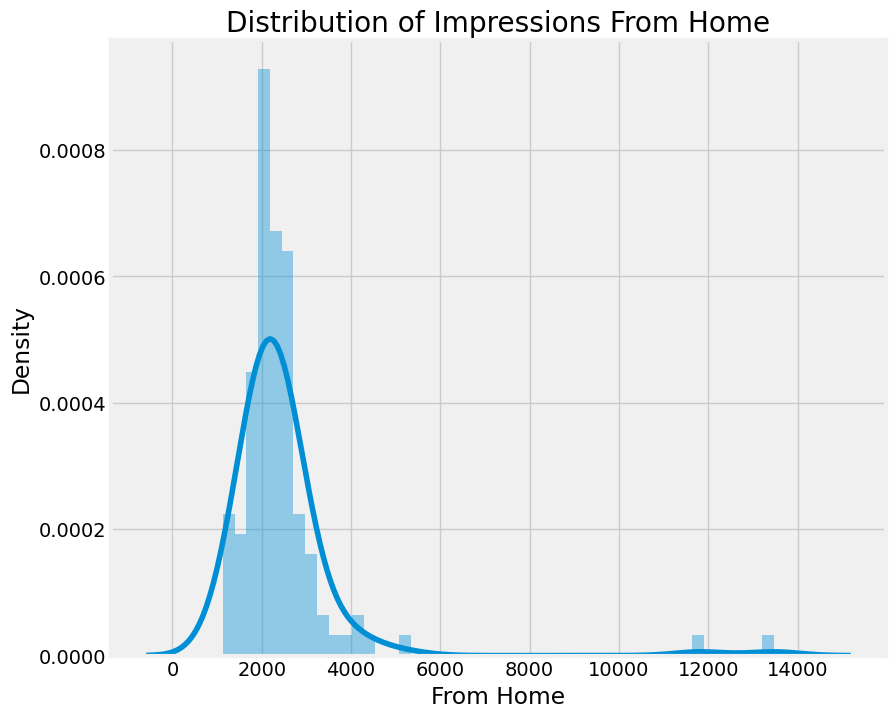

In [6]:
# Create a histogram to visualize the distribution of impressions from home
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

<ipython-input-7-a202e77a28ce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


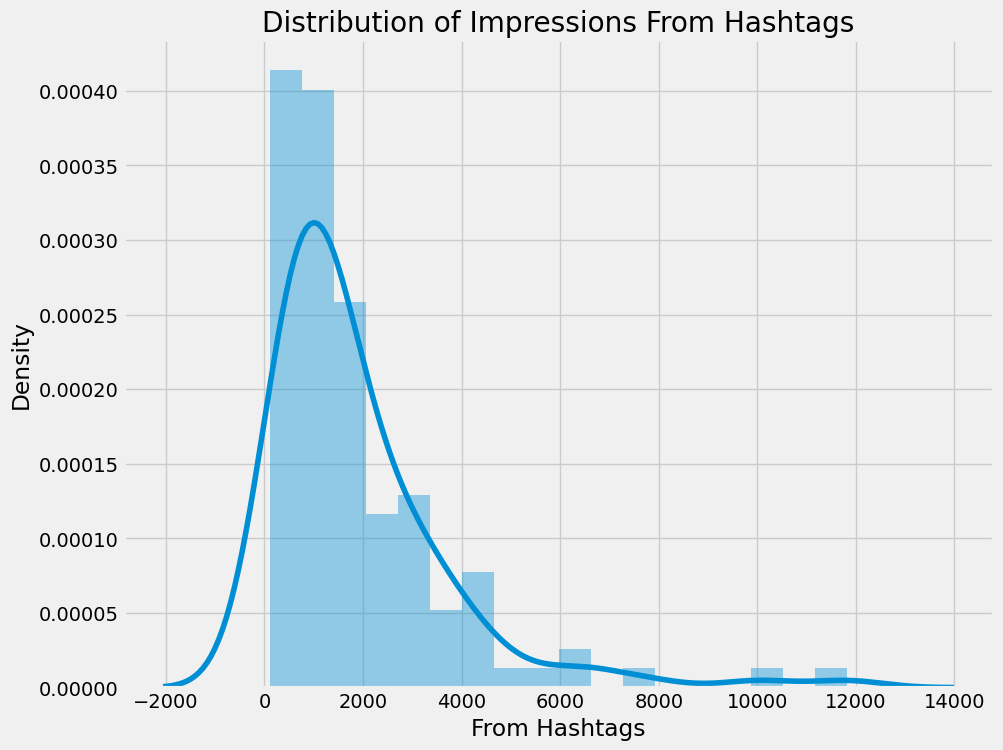

In [7]:
# Create a histogram to visualize the distribution of impressions from hashtag
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

<ipython-input-8-5dd54ccbd998>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


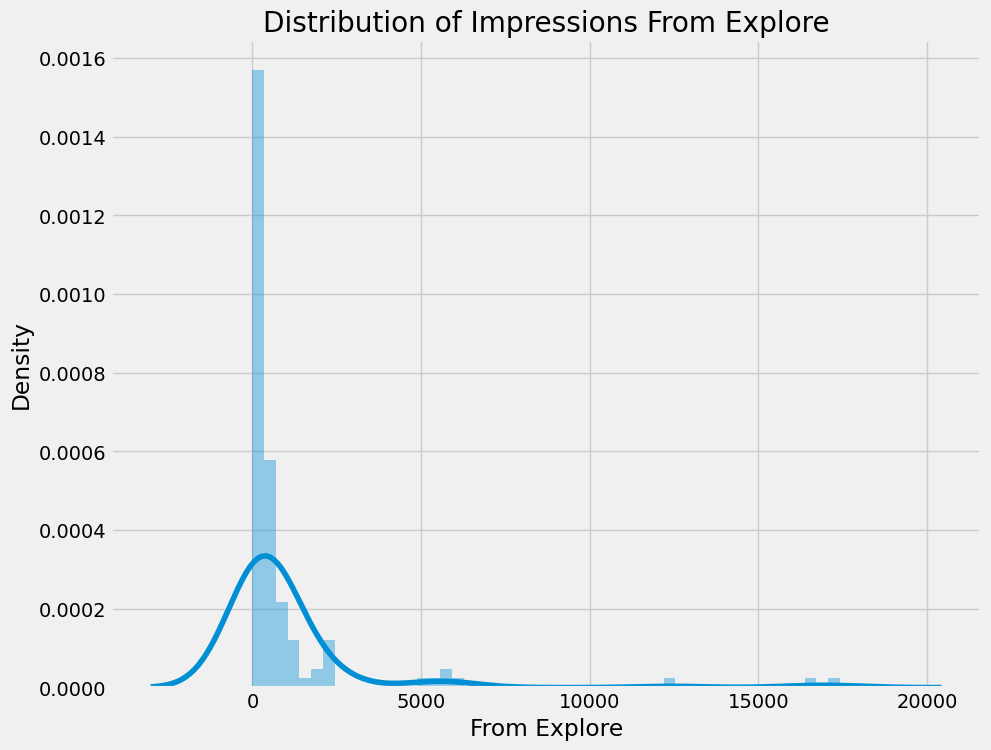

In [8]:
# Create a histogram to visualize the distribution of impressions from explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [9]:
# Calculate the total number of impressions from each source
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

In [10]:
# Create a pie chart to visualize the proportion of impressions from each source
labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

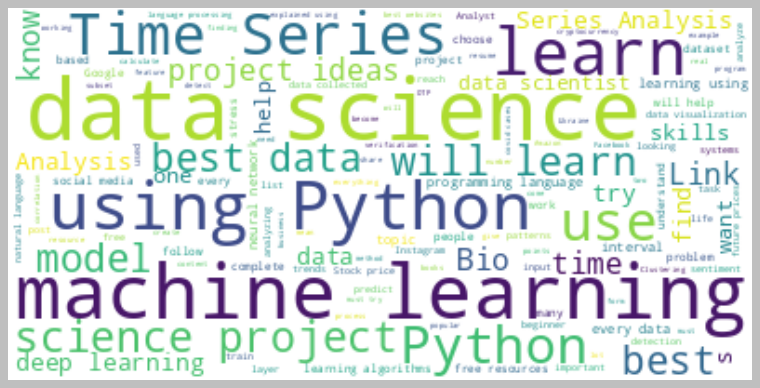

In [11]:
# Create a word cloud to visualize the most common words in the captions
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

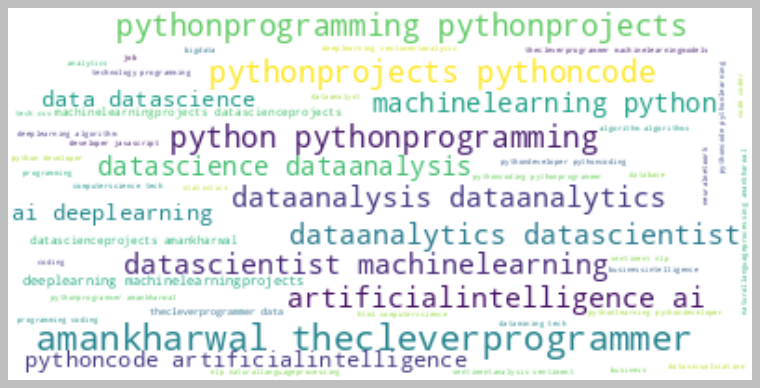

In [12]:
# Create a word cloud to visualize the most common hashtags
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Analyze the relationship between impressions and likes
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [14]:
# Analyze the relationship between impressions and comments
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [15]:
# Analyze the relationship between impressions and shares
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [16]:
# Analyze the relationship between impressions and saves
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [17]:
# Calculate the correlation between all columns in the data
correlation = data.select_dtypes(include=['int64', 'float64']).corr()

# Print the correlation between impressions and all other columns
print(correlation.loc["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [18]:
# Calculate the correlation between all columns in the data
correlation = data.select_dtypes(include=['int64', 'float64']).corr()

# Print the correlation between impressions and all other columns
print("Correlation between Impressions and other columns:")
print(correlation.loc["Impressions"].sort_values(ascending=False))

# Interpret the output:
# The columns with values close to 1 have a strong positive correlation with Impressions
# The columns with values close to -1 have a strong negative correlation with Impressions
# The columns with values close to 0 have a weak or no correlation with Impressions

# Print the top 3 columns with the strongest positive correlation with Impressions
print("\nTop 3 columns with strongest positive correlation with Impressions:")
print(correlation.loc["Impressions"].sort_values(ascending=False).head(3))

# Print the top 3 columns with the strongest negative correlation with Impressions
print("\nTop 3 columns with strongest negative correlation with Impressions:")
print(correlation.loc["Impressions"].sort_values(ascending=True).head(3))

Correlation between Impressions and other columns:
Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

Top 3 columns with strongest positive correlation with Impressions:
Impressions     1.000000
From Explore    0.893607
Follows         0.889363
Name: Impressions, dtype: float64

Top 3 columns with strongest negative correlation with Impressions:
Comments        -0.028524
From Hashtags    0.560760
From Other       0.592960
Name: Impressions, dtype: float64


In [19]:
# Calculate the conversion rate from profile visits to followers
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

# Print the conversion rate with a simple explanation
print(f"\nThat is {conversion_rate:.2f}% of profile visitors become followers after visiting the profile.")

41.00265604249668

That is 41.00% of profile visitors become followers after visiting the profile.


In [20]:
# Analyze the relationship between profile visits and followers
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [21]:
# Split the data into training and testing sets
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [22]:
# MODEL: Train a passive aggressive regressor model on the training data
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.4309380357757674

In [23]:
# Evaluate the model on the testing data
model.score(xtest, ytest)

0.4309380357757674

In [24]:
# Make a prediction using the model
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([7545.29265609])

In [25]:
# Get the input features from the user
print("Please enter the following features for the post:")
likes = float(input("Likes: "))
saves = float(input("Saves: "))
comments = float(input("Comments: "))
shares = float(input("Shares: "))
profile_visits = float(input("Profile Visits: "))
follows = float(input("Follows: "))

# Create a numpy array from the input features
features = np.array([[likes, saves, comments, shares, profile_visits, follows]])

# Make a prediction using the model
prediction = model.predict(features)

# Print the prediction in a way that's easy to understand
print("\nBased on the input features:")
#Example : 282
print("Likes:", likes)
#Example : 233
print("Saves:", saves)
#Example : 4
print("Comments:", comments)
#Example : 9
print("Shares:", shares)
#Example : 165
print("Profile Visits:", profile_visits)
#Example : 54
print("Follows:", follows)
print("The predicted number of impressions is:", round(prediction[0]))
print("This means that if a post has these characteristics, it can expect to receive approximately", round(prediction[0]), "impressions.")

Please enter the following features for the post:
Likes: 282
Saves: 233
Comments: 4
Shares: 9
Profile Visits: 165
Follows: 54

Based on the input features:
Likes: 282.0
Saves: 233.0
Comments: 4.0
Shares: 9.0
Profile Visits: 165.0
Follows: 54.0
The predicted number of impressions is: 7545
This means that if a post has these characteristics, it can expect to receive approximately 7545 impressions.
